# How to read in and use antenna pattern netCDF

In [101]:
using NCDatasets
using Plots

# this creates a data structure, no data is read in yet
ds = Dataset("../inputs/darts_ant_03192021.nc");

# create Hpol and Vpol groups, no data is read in yet
hpol = ds.group["Hpol"];
vpol = ds.group["Vpol"];


## Read and plot V-pol cuts

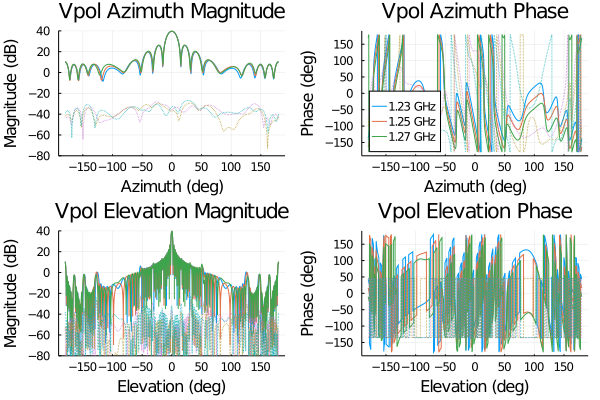

In [102]:
# read V pol Azimuth Cuts from netCDF file
copol_cut = vpol["copol_azimuth_cut_real"]+vpol["copol_azimuth_cut_imag"]im;
xpol_cut = vpol["crosspol_azimuth_cut_real"]+vpol["crosspol_azimuth_cut_imag"]im;

legstr = reshape([string(fr, " GHz") for fr in ds["frequency"]], 1,3)

# plot Magnitude
p1 = plot(ds["cut_azimuth"], 20*log10.(abs.(copol_cut)), 
    xlabel = "Azimuth (deg)", ylabel = "Magnitude (dB)", label="",
    title = "Vpol Azimuth Magnitude", ylims=(-80, 40))
p1 = plot!(ds["cut_azimuth"], 20*log10.(abs.(xpol_cut)), label="", linestyle = :dot)

# plot Phase
p2 = plot(ds["cut_azimuth"], 180/π*(angle.(copol_cut)), 
    label = legstr, legend = :bottomleft, xlabel = "Azimuth (deg)", 
    ylabel = "Phase (deg)", title = "Vpol Azimuth Phase")
p2 = plot!(ds["cut_azimuth"], 180/π*(angle.(xpol_cut)), label="", linestyle = :dot)



# read V pol Elevation Cuts from netCDF file
copol_cut = vpol["copol_elevation_cut_real"]+vpol["copol_elevation_cut_imag"]im;
xpol_cut = vpol["crosspol_elevation_cut_real"]+vpol["crosspol_elevation_cut_real"]im;

# plot Magnitude
p3 = plot(ds["cut_elevation"], 20*log10.(abs.(copol_cut)), 
    xlabel = "Elevation (deg)", ylabel = "Magnitude (dB)", label="",
    title = "Vpol Elevation Magnitude", ylims=(-80, 40))
p3 = plot!(ds["cut_elevation"], 20*log10.(abs.(xpol_cut)), label="", linestyle = :dot)

# plot Phase
p4 = plot(ds["cut_elevation"], 180/π*(angle.(copol_cut)), 
    label = "", xlabel = "Elevation (deg)", ylabel = "Phase (deg)", title = "Vpol Elevation Phase")
p4 = plot!(ds["cut_elevation"], 180/π*(angle.(xpol_cut)), label="", linestyle = :dot)


plot(p1, p2, p3, p4, layout = (2,2))


## plot H-pol Cuts

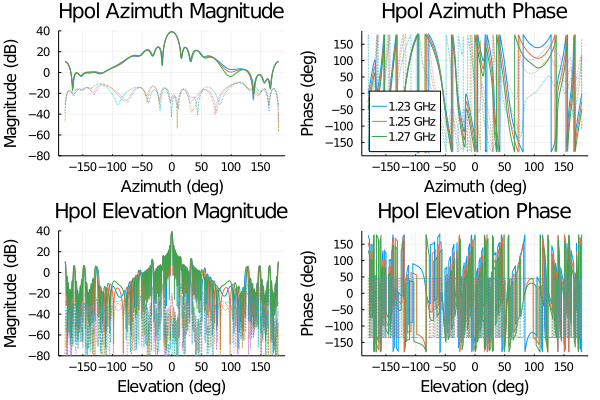

In [103]:
# read H pol Azimuth Cuts from netCDF file
copol_cut = hpol["copol_azimuth_cut_real"]+hpol["copol_azimuth_cut_imag"]im;
xpol_cut = hpol["crosspol_azimuth_cut_real"]+hpol["crosspol_azimuth_cut_imag"]im;


# plot Magnitude
p1 = plot(ds["cut_azimuth"], 20*log10.(abs.(copol_cut)), 
    label = "", xlabel = "Azimuth (deg)", ylabel = "Magnitude (dB)",
    title = "Hpol Azimuth Magnitude", ylims=(-80, 40))
p1 = plot!(ds["cut_azimuth"], 20*log10.(abs.(xpol_cut)), label="", linestyle = :dot)

# plot Phase
p2 = plot(ds["cut_azimuth"], 180/π*(angle.(copol_cut)), 
    label = legstr, legend = :bottomleft, xlabel = "Azimuth (deg)", 
    ylabel = "Phase (deg)", title = "Hpol Azimuth Phase")
p2 = plot!(ds["cut_azimuth"], 180/π*(angle.(xpol_cut)), label="", linestyle = :dot)



# read H pol Elevation Cuts from netCDF file
copol_cut = hpol["copol_elevation_cut_real"]+hpol["copol_elevation_cut_imag"]im;
xpol_cut = hpol["crosspol_elevation_cut_real"]+hpol["crosspol_elevation_cut_real"]im;

# plot Magnitude
p3 = plot(ds["cut_elevation"], 20*log10.(abs.(copol_cut)), 
    label = "", xlabel = "Elevation (deg)", ylabel = "Magnitude (dB)", 
    title = "Hpol Elevation Magnitude", ylims=(-80, 40))
p3 = plot!(ds["cut_elevation"], 20*log10.(abs.(xpol_cut)), label="", linestyle = :dot)

# plot Phase
p4 = plot(ds["cut_elevation"], 180/π*(angle.(copol_cut)), 
    label = "", xlabel = "Elevation (deg)", ylabel = "Phase (deg)", title = "Hpol Elevation Phase")
p4 = plot!(ds["cut_elevation"], 180/π*(angle.(xpol_cut)), label="", linestyle = :dot)


plot(p1, p2, p3, p4, layout = (2,2))


## Read and plot V-pol center frequency grid

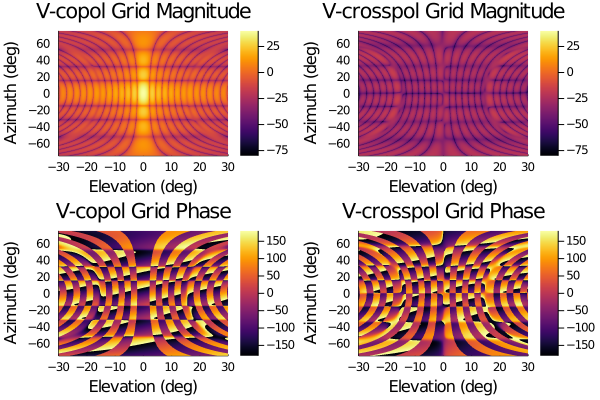

In [104]:
# read V pol Azimuth Cuts from netCDF file
copol_grid = vpol["copol_grid_real"]+vpol["copol_grid_imag"]im;
xpol_grid = vpol["crosspol_grid_real"]+vpol["crosspol_grid_imag"]im;

cfind = 2;
# plot Magnitude
p1 = heatmap(ds["grid_elevation"], ds["grid_azimuth"], 20*log10.(abs.(copol_grid[:,:,cfind])), 
    label = "", legend = :bottomleft, xlabel = "Elevation (deg)", ylabel = "Azimuth (deg)",
    title = "V-copol Grid Magnitude", clim=(-80,40))
p2 = heatmap(ds["grid_elevation"], ds["grid_azimuth"], 20*log10.(abs.(xpol_grid[:,:,cfind])), 
    label = "", legend = :bottomleft, xlabel = "Elevation (deg)", ylabel = "Azimuth (deg)",
    title = "V-crosspol Grid Magnitude", clim=(-80,40))

# plot Phase
p3 = heatmap(ds["grid_elevation"], ds["grid_azimuth"], 180/π*(angle.(copol_grid[:,:,cfind])), 
    label = "", legend = :bottomleft, xlabel = "Elevation (deg)", ylabel = "Azimuth (deg)",
    title = "V-copol Grid Phase")
p4 = heatmap(ds["grid_elevation"], ds["grid_azimuth"], 180/π*(angle.(xpol_grid[:,:,cfind])), 
    label = "", legend = :bottomleft, xlabel = "Elevation (deg)", ylabel = "Azimuth (deg)",
    title = "V-crosspol Grid Phase")

plot(p1, p2, p3, p4, layout = (2,2))


## Read and plot H-pol center frequency grid

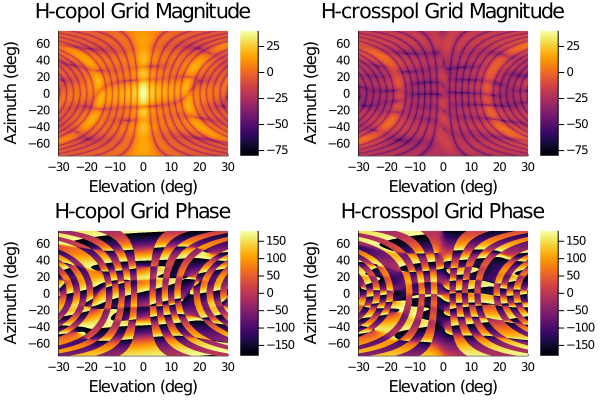

In [100]:
# read H pol Azimuth Cuts from netCDF file
copol_grid = hpol["copol_grid_real"]+hpol["copol_grid_imag"]im;
xpol_grid = hpol["crosspol_grid_real"]+hpol["crosspol_grid_imag"]im;

cfind = 2;
# plot Magnitude
p1 = heatmap(ds["grid_elevation"], ds["grid_azimuth"], 20*log10.(abs.(copol_grid[:,:,cfind])), 
    label = "", legend = :bottomleft, xlabel = "Elevation (deg)", ylabel = "Azimuth (deg)",
    title = "H-copol Grid Magnitude", clim=(-80,40))
p2 = heatmap(ds["grid_elevation"], ds["grid_azimuth"], 20*log10.(abs.(xpol_grid[:,:,cfind])), 
    label = "", legend = :bottomleft, xlabel = "Elevation (deg)", ylabel = "Azimuth (deg)",
    title = "H-crosspol Grid Magnitude", clim=(-80,40))

# plot Phase
p3 = heatmap(ds["grid_elevation"], ds["grid_azimuth"], 180/π*(angle.(copol_grid[:,:,cfind])), 
    label = "", legend = :bottomleft, xlabel = "Elevation (deg)", ylabel = "Azimuth (deg)",
    title = "H-copol Grid Phase")
p4 = heatmap(ds["grid_elevation"], ds["grid_azimuth"], 180/π*(angle.(xpol_grid[:,:,cfind])), 
    label = "", legend = :bottomleft, xlabel = "Elevation (deg)", ylabel = "Azimuth (deg)",
    title = "H-crosspol Grid Phase")

plot(p1, p2, p3, p4, layout = (2,2))